# Lecture 6
## Decision Trees
Inspirada en las clases de Layla Scheli @Platzi

Rafael Dávila Bugarín

UCA



In [1]:
#Importamos las librerias principales
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

Utilizaremos el **Breast Cancer** de Kaggle: https://www.kaggle.com/datasets/utkarshx27/breast-cancer-wisconsin-diagnostic-dataset

In [2]:
from IPython.display import Image
Image(url= "s11_brca.png", width=300, height=300)

In [3]:
#Cargamos dataset a utilizar
df_bc = pd.read_csv("s11_brca.csv")
df_bc.head(3)

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.04781,0.1885,...,19.26,99.70,711.2,0.1440,0.1773,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.03110,0.1967,...,20.49,96.09,630.5,0.1312,0.2776,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.02076,0.1815,...,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.2450,0.07773,B


## Análisis exploratorio de datos

In [4]:
df_bc.drop("Unnamed: 0", axis=1, inplace=True)  #inplace para guardar en la variable

In [5]:
#tipos de variables que tenemos
df_bc.dtypes

x.radius_mean          float64
x.texture_mean         float64
x.perimeter_mean       float64
x.area_mean            float64
x.smoothness_mean      float64
x.compactness_mean     float64
x.concavity_mean       float64
x.concave_pts_mean     float64
x.symmetry_mean        float64
x.fractal_dim_mean     float64
x.radius_se            float64
x.texture_se           float64
x.perimeter_se         float64
x.area_se              float64
x.smoothness_se        float64
x.compactness_se       float64
x.concavity_se         float64
x.concave_pts_se       float64
x.symmetry_se          float64
x.fractal_dim_se       float64
x.radius_worst         float64
x.texture_worst        float64
x.perimeter_worst      float64
x.area_worst           float64
x.smoothness_worst     float64
x.compactness_worst    float64
x.concavity_worst      float64
x.concave_pts_worst    float64
x.symmetry_worst       float64
x.fractal_dim_worst    float64
y                       object
dtype: object

In [6]:
#Describir las variables
df_bc["y"].value_counts()
# y es nuestra variable etiqueta (lo que queremos predecir)
# B benign
# M malign

B    357
M    212
Name: y, dtype: int64

In [7]:
#Eliminar la columna sobrante
df_bc.isnull().sum()

x.radius_mean          0
x.texture_mean         0
x.perimeter_mean       0
x.area_mean            0
x.smoothness_mean      0
x.compactness_mean     0
x.concavity_mean       0
x.concave_pts_mean     0
x.symmetry_mean        0
x.fractal_dim_mean     0
x.radius_se            0
x.texture_se           0
x.perimeter_se         0
x.area_se              0
x.smoothness_se        0
x.compactness_se       0
x.concavity_se         0
x.concave_pts_se       0
x.symmetry_se          0
x.fractal_dim_se       0
x.radius_worst         0
x.texture_worst        0
x.perimeter_worst      0
x.area_worst           0
x.smoothness_worst     0
x.compactness_worst    0
x.concavity_worst      0
x.concave_pts_worst    0
x.symmetry_worst       0
x.fractal_dim_worst    0
y                      0
dtype: int64

In [8]:
#Head de lo que tenemos
#df_bc.columns
df_bc = pd.get_dummies(df_bc, columns=["y"], drop_first=True, dtype="int")

In [10]:
df_bc.columns

Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_mean', 'x.fractal_dim_mean',
       'x.radius_se', 'x.texture_se', 'x.perimeter_se', 'x.area_se',
       'x.smoothness_se', 'x.compactness_se', 'x.concavity_se',
       'x.concave_pts_se', 'x.symmetry_se', 'x.fractal_dim_se',
       'x.radius_worst', 'x.texture_worst', 'x.perimeter_worst',
       'x.area_worst', 'x.smoothness_worst', 'x.compactness_worst',
       'x.concavity_worst', 'x.concave_pts_worst', 'x.symmetry_worst',
       'x.fractal_dim_worst', 'y_M'],
      dtype='object')

In [12]:
#Analizamos el shape del objeto
#Separamos nuestros X (predictores) Y (target)
X = df_bc.drop(["y_M"], axis=1)
Y = df_bc["y_M"]

from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=3, random_state=0)


In [13]:
# Exploremos un poco mas la variable target
print(X_train.shape)
print(X_test.shape)

(566, 30)
(3, 30)


In [15]:
#Verificamos valores missings
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=2, random_state=0)

#fit
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Procesamiento de datos

[Text(0.5, 0.8333333333333334, 'x.radius_worst <= 16.795\ngini = 0.466\nsamples = 566\nvalue = [357, 209]'),
 Text(0.25, 0.5, 'x.concave_pts_worst <= 0.136\ngini = 0.151\nsamples = 377\nvalue = [346, 31]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.03\nsamples = 333\nvalue = [328, 5]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.483\nsamples = 44\nvalue = [18, 26]'),
 Text(0.75, 0.5, 'x.texture_worst <= 19.91\ngini = 0.11\nsamples = 189\nvalue = [11, 178]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.023\nsamples = 172\nvalue = [2, 170]')]

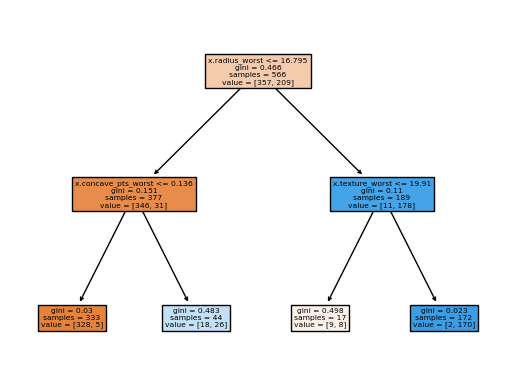

In [16]:
from sklearn.tree import plot_tree

plot_tree(dtc, feature_names=X.columns, filled=True)

In [18]:
# Cambiar a la variable Target o class
y_train_pred_tree = dtc.predict(X_train)
y_test_pred_tree = dtc.predict(X_test)

In [19]:
#Ver cómo nos quedó y_M
y_train_pred_tree[:10]

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])

In [22]:
#Separamos en X e y

####     WEIRD
from sklearn.metrics import accuracy_score

train_accuracy_score = accuracy_score(Y_train, y_train_pred_tree)

train_accuracy_score

test_accuracy_score = accuracy_score(Y_test, y_test_pred_tree)

test_accuracy_score

1.0

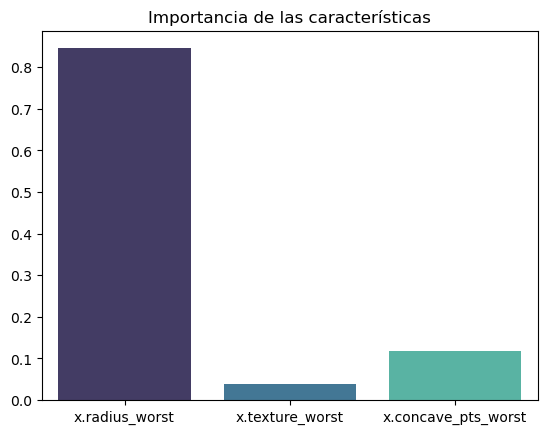

In [25]:
importances = dtc.feature_importances_
columns = X.columns

sns.barplot(x=np.array(columns)[importances > 0], y=importances[importances>0], palette="mako")
plt.title("Importancia de las características")

plt.show()

In [28]:
!pip install dtreeviz

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.5/91.5 kB 815.0 kB/s eta 0:00:00 kB/s eta 0:00:01


In [29]:
import graphviz

import dtreeviz

viz_model = dtreeviz.model(dtc,
                          X_train=X,y_train=y)


In [ ]:
#Importamos las librerias necesarias para la creacion del modelo
from sklearn.model_selection import train_test_split

#30% para test y 70% para train, random state 1


In [ ]:
#Veamos que obtuvimos


In [ ]:
#Veamos que tenemos. Por ejemplo, en X_train


## Entrenamiento de modelo de clasificación con árbol de decisión

In [ ]:
#!pip install category-encoders 
#Si tuvieramos variables ordinales podríamos usar estos encoders.

In [ ]:
#Importar árbol de decisión
from sklearn.tree import DecisionTreeClassifier

#Creacion del modelo


In [ ]:
#Entrenamiento


In [ ]:
#Graficando el modelo
from sklearn.tree import plot_tree


In [ ]:
#Calculo de las predicciones en Train y Test


## Evaluación de modelo de clasificación con árbol de decisión

In [ ]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train


#Calculo el accuracy en Test


print('El accuracy en train es:', )
print('El accuracy en test es:', )

In [ ]:
#Importando para gráfica
import seaborn as sns
import graphviz
import dtreeviz


In [ ]:
#!brew install graphviz

In [ ]:
# render as SVG into internal object 


## Entrenamiento de modelo de clasificación con random forest

In [ ]:
#Importar random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 10, random_state =0)
rf.fit(X_train, y_train)

In [ ]:
#Calculo de las predicciones en Train y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

## Evaluación de modelo de clasificación con random forest

In [ ]:
#Calculo de metricas 
from sklearn.metrics import accuracy_score

#Calculo el accuracy en Train
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

#Calculo el accuracy en Test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

#Importante: podriamos reducir el numero de estimadores para disminuir el sobreajuste del modelo.

In [ ]:
# Visualizacion de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

In [ ]:
#Grafico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index,palette='mako')
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [ ]:
# Matriz de confusion del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusion\n\n', cm)

In [ ]:
#RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))